In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings

warnings.filterwarnings("ignore")

In [3]:
red = pd.read_csv('/content/drive/MyDrive/Colaboratory/Wine Dataset/Dataset/Red.csv')
rose = pd.read_csv('/content/drive/MyDrive/Colaboratory/Wine Dataset/Dataset/Rose.csv')
sparkling = pd.read_csv('/content/drive/MyDrive/Colaboratory/Wine Dataset/Dataset/Sparkling.csv')
varieties = pd.read_csv('/content/drive/MyDrive/Colaboratory/Wine Dataset/Dataset/Varieties.csv')
white = pd.read_csv('/content/drive/MyDrive/Colaboratory/Wine Dataset/Dataset/White.csv')

In [4]:
red['Wine_Style'] = 'red'
rose['Wine_Style'] = 'rose'
sparkling['Wine_Style'] = 'sparkling'
varieties['Wine_Style'] = 'varieties'
white['Wine_Style'] = 'white'

wines = pd.concat([red, rose, sparkling, white], ignore_index=True)

In [5]:
wines.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Wine_Style
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,red


In [6]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             13834 non-null  object 
 1   Country          13834 non-null  object 
 2   Region           13834 non-null  object 
 3   Winery           13834 non-null  object 
 4   Rating           13834 non-null  float64
 5   NumberOfRatings  13834 non-null  int64  
 6   Price            13834 non-null  float64
 7   Year             13834 non-null  object 
 8   Wine_Style       13834 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 972.8+ KB


In [7]:
wines['Wine_Style'].value_counts()

red          8666
white        3764
sparkling    1007
rose          397
Name: Wine_Style, dtype: int64

In [8]:
wines.isna().sum()

Name               0
Country            0
Region             0
Winery             0
Rating             0
NumberOfRatings    0
Price              0
Year               0
Wine_Style         0
dtype: int64

In [9]:
wines.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Wine_Style
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,red


In [10]:
wines.shape

(13834, 9)

In [11]:
wines['Year'] = wines['Year'].replace('N.V.', 2030) 
wines['Year'] = wines['Year'].astype('int')

In [12]:
# plt.figure(figsize=(15, 9))
# sns.histplot(data= wines, x = 'Price', hue = 'Wine_Style')

<Figure size 1080x4320 with 0 Axes>

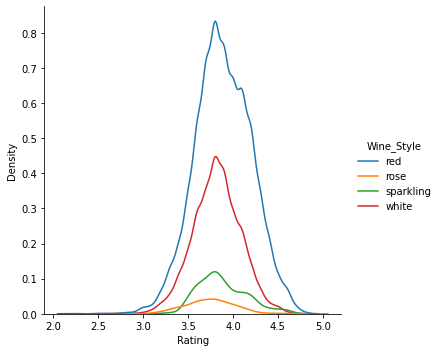

In [13]:
plt.figure(figsize = (15, 60))
sns.displot(data = wines, x = 'Rating', hue = 'Wine_Style', kind = 'kde')

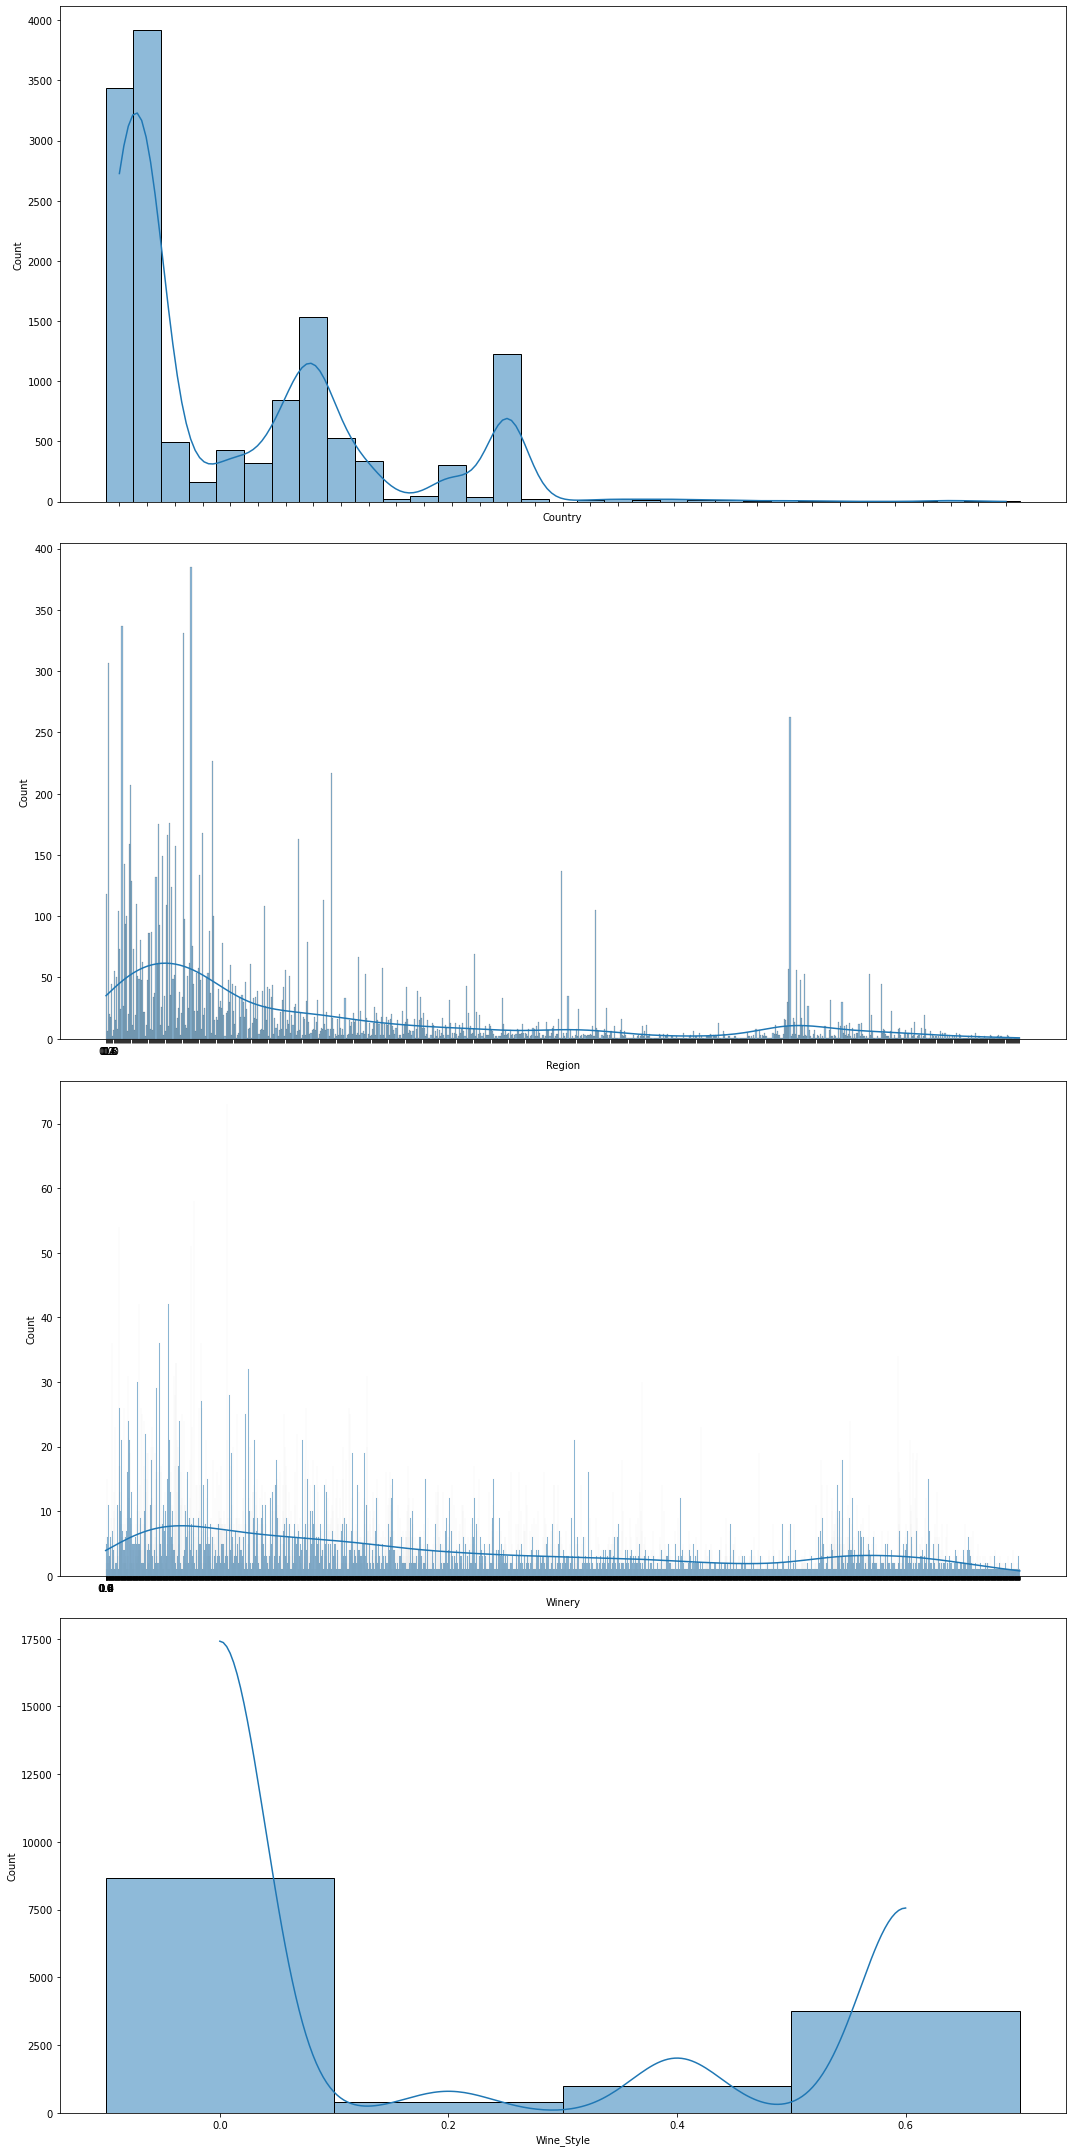

In [14]:
cat_col = ['Country', 'Region', 'Winery', 'Wine_Style']

f, ax = plt.subplots(4, 1, figsize = (15, 30))
for i, col in enumerate(cat_col):
  sns.histplot(wines, x = col, ax=ax[i], kde = True)
  ax[i].set_xticklabels(ax[i].get_xticklabels())
  plt.tight_layout()

In [15]:
wines['Country'].value_counts()

Italy             3919
France            3436
Spain             1533
Germany           1229
South Africa       846
United States      530
Austria            492
Chile              431
Portugal           336
Australia          318
Argentina          308
New Zealand        165
Brazil              50
Romania             37
Greece              25
Israel              23
Switzerland         23
Hungary             19
Slovenia            18
Moldova             16
Lebanon             16
Luxembourg          14
Georgia             13
Turkey              10
Croatia              6
Uruguay              5
Canada               3
China                3
United Kingdom       3
Czech Republic       2
Bulgaria             2
Slovakia             2
Mexico               1
Name: Country, dtype: int64

In [16]:
h_country = wines.Country.value_counts()[:12]

h_country

Italy            3919
France           3436
Spain            1533
Germany          1229
South Africa      846
United States     530
Austria           492
Chile             431
Portugal          336
Australia         318
Argentina         308
New Zealand       165
Name: Country, dtype: int64

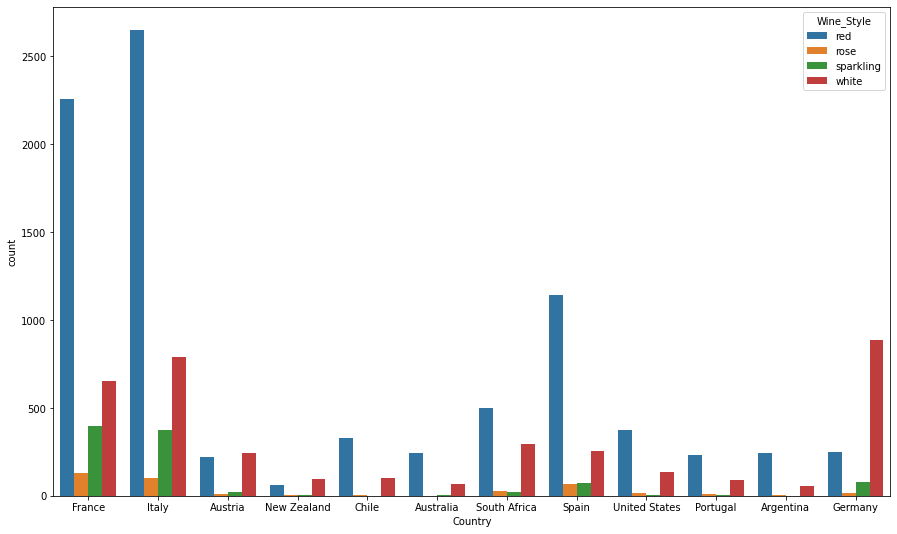

In [17]:
plt.figure(figsize=(15, 9))
sns.countplot(x='Country', data = wines[wines.Country.isin(h_country.index.values)], hue = 'Wine_Style')

In [18]:
wines.dtypes

Name                object
Country             object
Region              object
Winery              object
Rating             float64
NumberOfRatings      int64
Price              float64
Year                 int64
Wine_Style          object
dtype: object

In [19]:
label_encoder = LabelEncoder()

# wines_encode = wines.copy().drop(columns =['Name'])

cat_cols = [col for col in wines.columns if wines[col].dtype == "object"]
for col in cat_cols:
  wines[col] = label_encoder.fit_transform(wines[col])


In [20]:
wines.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Wine_Style
0,7343,10,574,791,4.2,100,95.00,2011,0
1,5677,10,404,891,4.3,100,15.50,2017,0
2,3457,16,748,2809,3.9,100,7.45,2015,0
3,753,16,61,559,3.5,100,8.72,2019,0
4,7992,2,143,2289,3.9,100,29.15,2016,0


In [21]:
# cat_col = [['Name', 'Country', 'Region',	'Winery', 'Wine_Style']]
# cat_col = le.fit_transform(cat_col)
# wines = wines.apply(LabelEncoder().fit_transform)
#cat_cols = [col for col in wines_encode.columns if wines_encode[col].dtype == "object"]
# for col in cat_cols:
# wines_encode[col] = label_encoder.fit_transform(wines_encode[col])


# le = LabelEncoder()


# wines['Name'] = le.fit_transform(wines['Name'])
#wines['Country'] = le.fit_transform(wines['Country'])
#wines['Region'] = le.fit_transform(wines['Region'])
#wines['Winery'] = le.fit_transform(wines['Winery'])
#wines['Wine_Style'] = le.fit_transform(wines['Wine_Style'])

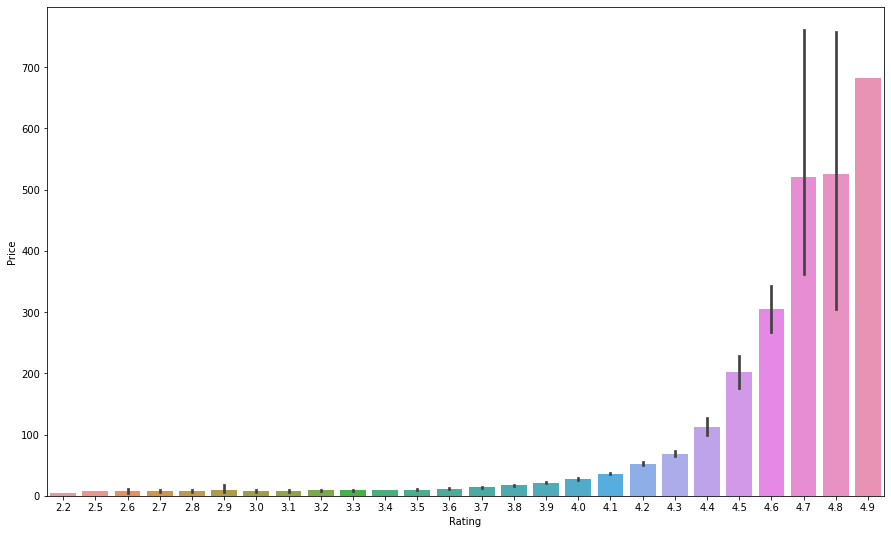

In [22]:
plt.figure(figsize = (15, 9))
sns.barplot(x = 'Rating', y = 'Price', data =  wines)
plt.show() 

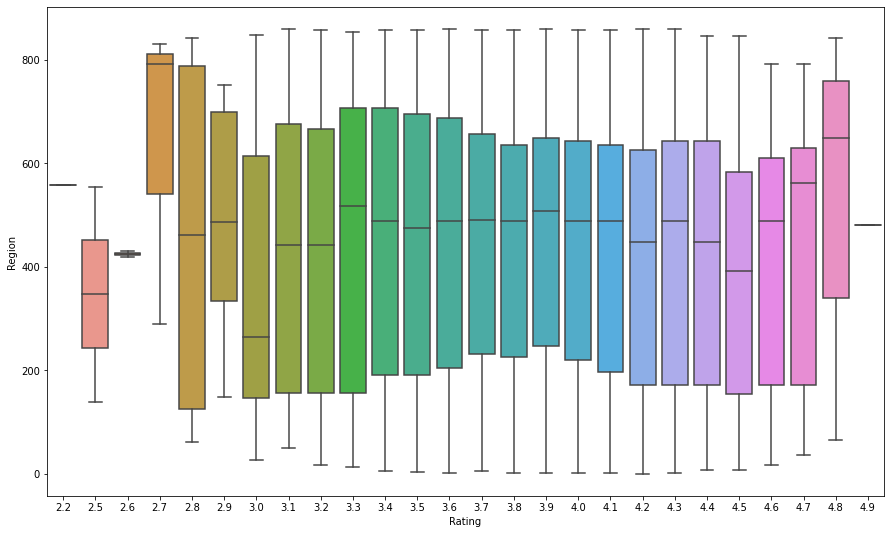

In [23]:
plt.figure(figsize = (15, 9))
sns.boxplot(x = 'Rating', y = 'Region', data =  wines)
plt.show()

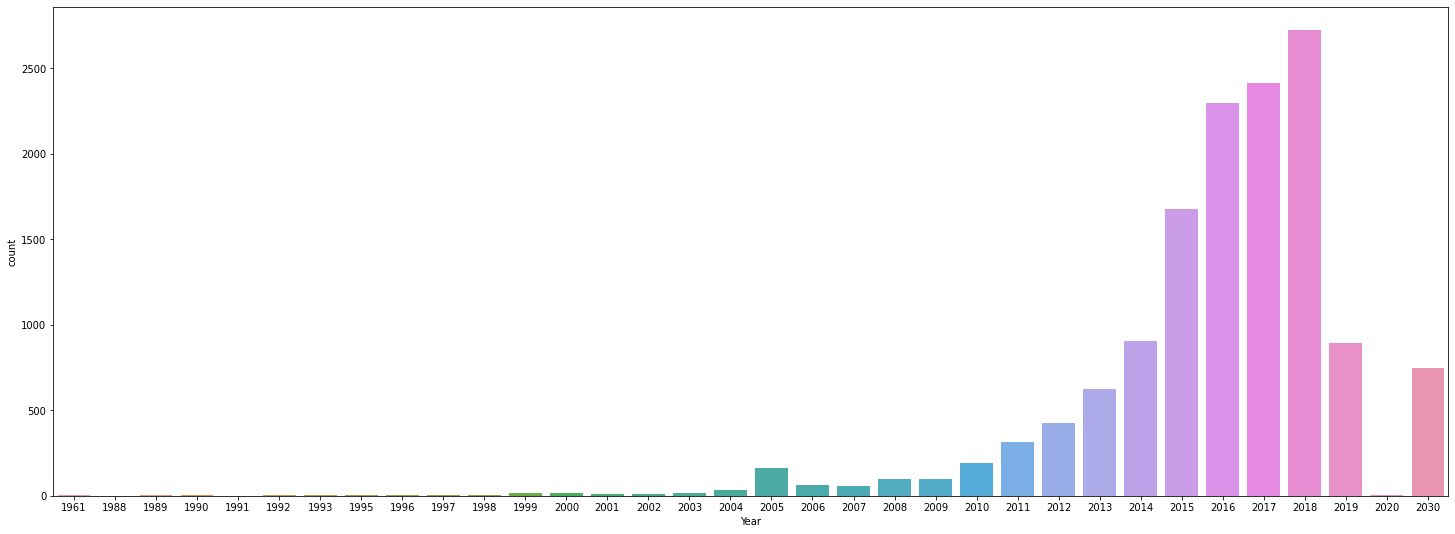

In [24]:
plt.figure(figsize = (25, 9))
sns.countplot(data = wines, x = "Year")

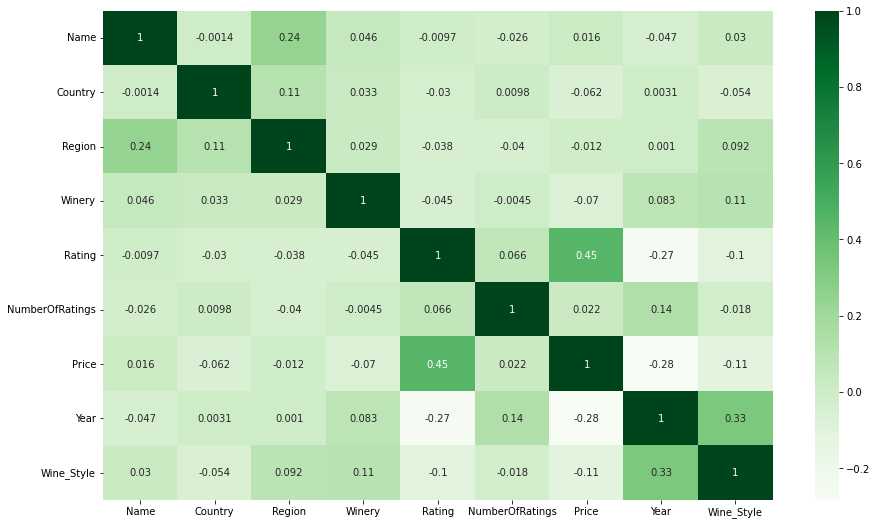

In [25]:
#corr = wines.corr()

plt.figure(figsize=(15, 9))
sns.heatmap(wines.corr(), annot = True, cmap = 'Greens')

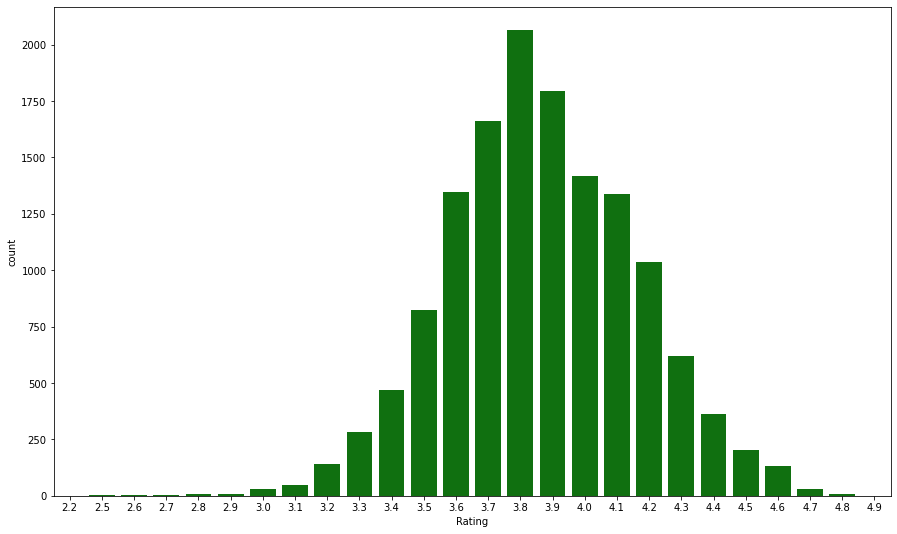

In [26]:
plt.figure(figsize = (15, 9))
sns.countplot(x = 'Rating', data = wines, color = 'green')
plt.show()

In [27]:
X = wines.drop(columns = ['Rating'], axis = 1)
y = wines['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (11067, 8)
Shape of X_test: (2767, 8)
Shape of y_train: (11067,)
Shape of y_test: (2767,)


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

In [29]:
def models(X_train_scale, y_train):

  linreg = LinearRegression()
  linreg = linreg.fit(X_train_scale, y_train)
  y_pred = linreg.predict(X_test_scale)

  print('Linear Regressor Algorithm')
  r2 = r2_score(y_test,  y_pred)
  print('r2_score:', r2)
  mse = mean_squared_error(y_test, y_pred)
  print('mse:', mse)
  mae = mean_absolute_error(y_test, y_pred)
  print('mae:', mae)

  lasso = Lasso()
  lasso = lasso.fit(X_train_scale, y_train)
  y_pred = lasso.predict(X_test_scale)

  print('\nLasso Algorithm')
  r2 = r2_score(y_test, y_pred)
  print('r2_score:', r2)
  mse = mean_squared_error(y_test, y_pred)
  print('mse:', mse)
  mae = mean_absolute_error(y_test, y_pred)
  print('mae', mae)

  forest = RandomForestRegressor()
  forest = forest.fit(X_train_scale, y_train)
  y_pred = forest.predict(X_test_scale)

  print('\nRandom Forest Algorithm')
  r2 = r2_score(y_test, y_pred)
  print('r2_score:', r2)
  mse = mean_squared_error(y_test, y_pred)
  print('mse:', mse)
  mae = mean_absolute_error(y_test, y_pred)
  print('mae:', mae)


  boostreg = GradientBoostingRegressor()
  boostreg = boostreg.fit(X_train_scale, y_train)
  y_pred = boostreg.predict(X_test_scale)

  print('\nGradienBoostRegressor Algorithm')
  r2 = r2_score(y_test, y_pred)
  print('r2_score:', r2)
  mse = mean_squared_error(y_test, y_pred)
  print('mse:', mse)
  mae = mean_absolute_error(y_test, y_pred)
  print('mae:', mae)

  svr = SVR()
  svr = svr.fit(X_train_scale, y_train)
  y_pred =svr.predict(X_test_scale)

  print('\nSVR Algorithm')
  r2 = r2_score(y_test, y_pred)
  print('r2_score:', r2)
  mse = mean_squared_error(y_test, y_pred)
  print('mse:', mse)
  mae = mean_absolute_error(y_test, y_pred)
  print('mae:', mae)


In [30]:
model = models(X_train_scale, y_train)

Linear Regressor Algorithm
r2_score: 0.26249724957822607
mse: 0.06466904018442475
mae: 0.19958083966142795

Lasso Algorithm
r2_score: -0.0001078398266964875
mse: 0.08769596322932084
mae 0.23667355933594858

Random Forest Algorithm
r2_score: 0.5346282417673296
mse: 0.040806823997108777
mae: 0.15575858330321646

GradienBoostRegressor Algorithm
r2_score: 0.5699038156889514
mse: 0.03771363213285961
mae: 0.15059292408754305

SVR Algorithm
r2_score: 0.5696885353972099
mse: 0.0377325093096967
mae: 0.15029706306673812


In [31]:
models = {}
y_pred = {}

models['Linear Regressor'] = LinearRegression()
models['Lasso'] = Lasso()
models['Random Forest Regressor'] = RandomForestRegressor()
models['Gradient Boosting'] = GradientBoostingRegressor()
models['SVR'] = SVR()


for m in models:
  models[m].fit(X_train_scale, y_train)
  y_pred[m] = models[m].predict(X_test)

In [32]:
for models in y_pred:
  
  r2[models] = r2_score(y_test, y_pred[models])
  mae[models] = mean_absolute_error(y_test, y_pred[models])
  mse[models] = mean_squared_error(y_test, y_pred[models])

  print('\n{}'.format(models), r2[models])
  print('\n{}'.format(models), mae[models])
  print('\n{}'.format(models), mse[models])

NameError: ignored